## ex 9

In [9]:
from sklearn.datasets import fetch_openml
import numpy as np

In [5]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [11]:
X = mnist['data']
y = mnist['target'].astype(np.uint8)
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [14]:
import matplotlib.pyplot as plt


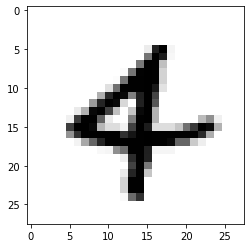

In [24]:
plt.imshow(X_train[150].reshape(28,28), cmap="gray_r")

### - A simple linear svc


In [27]:
from sklearn.metrics import accuracy_score

In [25]:
from sklearn.svm import LinearSVC

In [34]:
linear_svc = LinearSVC(C = 1, random_state=42)
linear_svc.fit(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'n_jobs'

In [31]:
y_train_preds = linear_svc.predict(X_train)
accuracy_score(y_true=y_train, y_pred=y_train_preds)

0.8733

### - simple poly kernel

In [32]:
from sklearn.svm import SVC

In [35]:
poly_svc = SVC(kernel="poly", degree=2, C=1, random_state=42)
poly_svc.fit(X_train, y_train)

/home/nimahsn/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [36]:
y_train_preds = poly_svc.predict(X_train)
accuracy_score(y_true=y_train, y_pred=y_train_preds)

1.0

### - Cross Validation with polynomial and RBF

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
cv_poly_svc = SVC(C=1, kernel="poly", degree=2)
cv_poly_svc_score = cross_val_score(cv_poly_svc, X_train, y_train, cv=6, verbose=5, n_jobs=5)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of   6 | elapsed: 10.4min remaining: 10.4min
[Parallel(n_jobs=5)]: Done   6 out of   6 | elapsed: 16.7min finished


In [47]:
cv_poly_svc_score

array([0.9806097 , 0.98110378, 0.97720228, 0.9779978 , 0.97439232,
       0.98079232])

In [48]:
cv_rbf_svc = SVC(gamma="scale", C=1, kernel="rbf")
cv_rbf_svc_score = cross_val_score(cv_rbf_svc, X_train, y_train_preds, cv=6, verbose=1, n_jobs=6)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed: 19.4min remaining: 38.8min
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed: 19.6min finished


In [49]:
cv_rbf_svc_score



array([0.97881059, 0.97870426, 0.97630237, 0.97649765, 0.97259178,
       0.9804922 ])

### - Poly SVC grid search with CV


